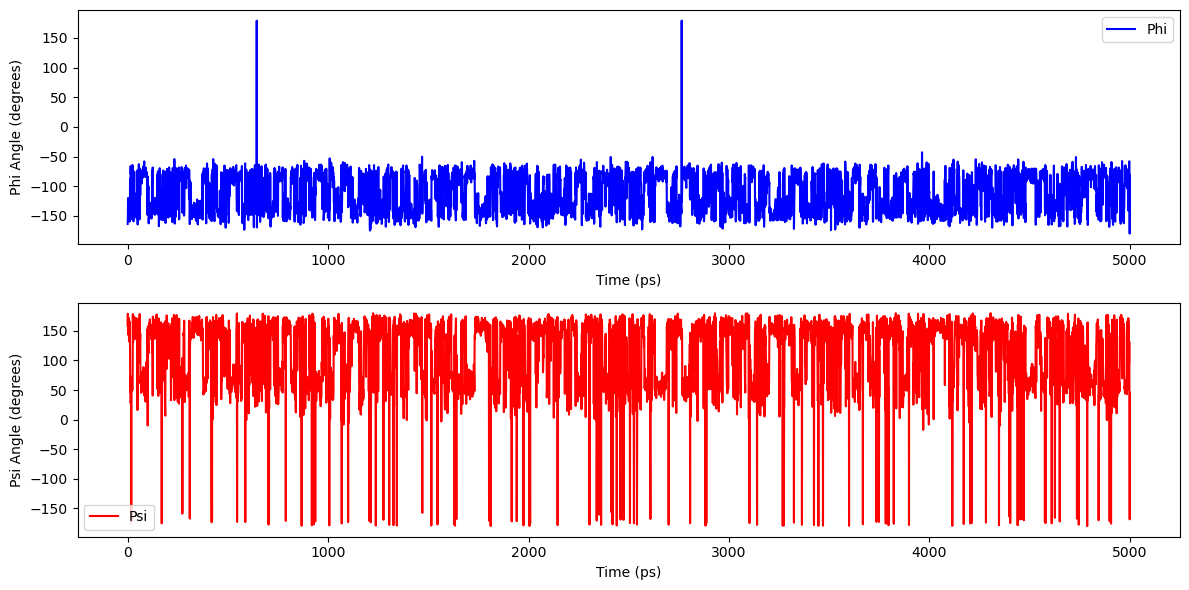

In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology files
trajectory_file = '/home/yk3019/comp-lab-class-2023/Week5/data/adp_md.trr'
topology_file = '/home/yk3019/comp-lab-class-2023/Week5/data/adp_md.gro'

# Load the trajectory using MDTraj
traj = md.load(trajectory_file, top=topology_file)

# Compute the phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj, periodic=False)  # Use periodic=False if your trajectory is not periodic
psi_indices, psi_angles = md.compute_psi(traj, periodic=False)

# Extract time from the trajectory
time = traj.time

# Convert radians to degrees for phi and psi angles
phi_angles_deg = np.degrees(phi_angles)
psi_angles_deg = np.degrees(psi_angles)

# Create a plot of phi vs. time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, phi_angles_deg, label='Phi', color='blue')
plt.xlabel('Time (ps)')
plt.ylabel('Phi Angle (degrees)')
plt.legend()

# Create a plot of psi vs. time
plt.subplot(2, 1, 2)
plt.plot(time, psi_angles_deg, label='Psi', color='red')
plt.xlabel('Time (ps)')
plt.ylabel('Psi Angle (degrees)')
plt.legend()

plt.tight_layout()
plt.show()


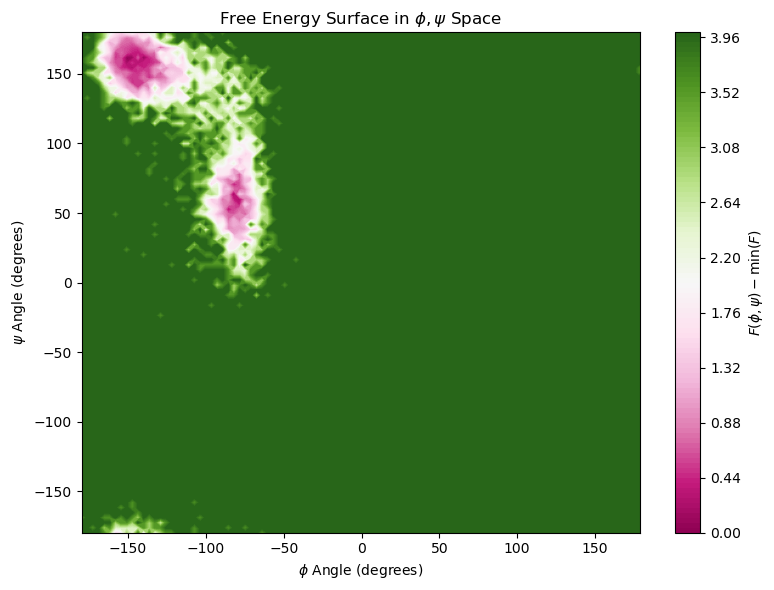

In [4]:
import mdtraj as md
import matplotlib.pyplot as plt
import math


# Load the trajectory using MDTraj
traj = md.load(trajectory_file, top=topology_file)

# Compute the phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj, periodic=False)
psi_indices, psi_angles = md.compute_psi(traj, periodic=False)

# Convert radians to degrees for phi and psi angles
phi_angles_deg = [math.degrees(angle) for angle in phi_angles]
psi_angles_deg = [math.degrees(angle) for angle in psi_angles]

# Define the number of bins for the 2D histogram
num_bins = 100

# Compute the 2D histogram
hist, xedges, yedges = np.histogram2d(phi_angles_deg, psi_angles_deg, bins=num_bins, normed=True)

# Avoid log(0) when computing free energy
hist[hist == 0] = 1e-5

# Compute free energy
F = -np.log(hist)

# Subtract the minimum free energy
F -= np.min(F)

plt.figure(figsize=(8, 6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.contourf(F.T, 100, cmap="PiYG", extent=extent,)
plt.colorbar(label=r"$F(\phi, \psi) - \min(F)$")
plt.xlabel(r'$\phi$ Angle (degrees)')
plt.ylabel(r'$\psi$ Angle (degrees)')
plt.title('Free Energy Surface in $\phi, \psi$ Space')
plt.tight_layout()
plt.show()
